[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/SahilTikale/FLOCX-Notebooks/master?labpath=validating_simulator_withNodes%2FSiloSimRun_VS_nonodeSim_VS_RealExperiment.ipynb)
to interact with this notebook

# This Notebook demonstrates that the SILO simulator is validated using runs from Real World Experiments.


In [1]:
import pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import nbinom
import math

# Screen size adjustment for the graphs
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
realSilo = 'real_world_experimental_data'
ostackR06 = pd.read_csv(realSilo+'/ostack_silo-12h-run-06_metrics.csv')
sparkR07 = pd.read_csv(realSilo+'/spark_silo-12h-run-07_metrics.csv')
slurmR03 = pd.read_csv(realSilo+'/slurm_silo-12h-run-03_metrics.csv')

In [3]:
simSilo = 'simulation_data'
sim_bgd_main = pd.read_csv(simSilo+'/bigdata_main_all_output.csv')
sim_cld50 = pd.read_csv(simSilo+'/cloud50_all_output.csv')
sim_hpc_main = pd.read_csv(simSilo+'/hpc_main_all_output.csv')

In [4]:
nonode_simSilo = 'nonode_sim_data'
nonode_sim_bgd_main = pd.read_csv(nonode_simSilo+'/bigdata_main_all_output.csv')
nonode_sim_cld50 = pd.read_csv(nonode_simSilo+'/cloud50_all_output.csv')
nonode_sim_hpc_main = pd.read_csv(nonode_simSilo+'/hpc_main_all_output.csv')

In [5]:
def node_usage_graph(data=None, max_nodes=None, title=None):
    nodeusage = data
    ax = nodeusage.set_index('timestamp').plot(figsize=(32, 8))
    
    #if 'nodes_inuse' in nodeusage.columns and 'nodes_indemand' not in nodeusage.columns:
    #    max_nodes = max(max(nodeusage['nodes_inuse']), max(nodeusage['nodes_owned']))
    #    y_tick_value_list = [*range(0, max_nodes+1, 3)]
    #    ax.set_yticks(y_tick_value_list)
        
    x_tick_value_list = [*range(0, 43201, 600)]
    if max_nodes:
        y_tick_value_list = [*range(0, max_nodes+1, 3)]
        ax.set_yticks(y_tick_value_list)

    ax.set_xticks(x_tick_value_list)
    
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.xlabel('Time interval in seconds', fontsize=24)
    plt.xticks(rotation=45)
    plt.ylabel('No of Nodes', fontsize=24)
    plt.title(title, fontsize=24)
    plt.legend(fontsize=18)
    plt.grid()
    plt.show()
    
def core_usage_graph(data, max_nodes, title):
    coreusage = data
    ax = coreusage.set_index('timestamp').plot(figsize=(32, 8))
    max_cores = 24*max_nodes

    x_tick_value_list = [*range(0, 43201, 600)]
    y_tick_value_list = [*range(0, max_cores+1, 72)]
    ax.set_xticks(x_tick_value_list)
    ax.set_yticks(y_tick_value_list)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.xlabel('Time interval in seconds', fontsize=24)
    plt.xticks(rotation=45)
    plt.ylabel('No of Cores', fontsize=24)
    plt.title(title, fontsize=24)
    plt.legend(fontsize=18)
    plt.grid()
    plt.show()

# Validating Cloud Simulation

In [6]:
# collect timestamps at which utilization data is available for the real experiment. 
real_timestamps = ostackR06['timestamp'].to_list() 
#ostackR06.tail() #shows that the value we need is 43191 
real_run = ostackR06.loc[ostackR06['timestamp']<= 43200].copy()
real_run.tail()

,timestamp,nodes_owned,nodes_cur_cap,nodes_in_use,nodes_indemand,cores_owned,cores_cur_cap,cores_in_use,cores_indemand,jobs_waiting,jobs_running,jobs_completed,jobs_failed
4080,43154,20,20,6,na,480,480,122,na,0,35,784,NaN
4081,43164,20,20,6,na,480,480,122,na,0,35,784,NaN
4082,43175,20,20,6,na,480,480,122,na,0,35,784,NaN
4083,43185,20,20,6,na,480,480,122,na,0,35,784,NaN
4084,43196,20,20,6,na,480,480,122,na,0,35,784,NaN


In [7]:
sim_cld50.tail() # Simulator can generate the utilization data for each second.

,timestamp,cluster,nodes_owned,nodes_borrowed,nodes_offered,nodes_cur_cap,nodes_inuse,nodes_indemand,jobs_waiting,jobs_running,jobs_done,jobs_rerun,cores_owned,cores_cur_cap,cores_inuse,cores_indemand
43195,43195,cloud50,20,0,0,20,6,NaN,0,35,784,0,480,480,122.0,NaN
43196,43196,cloud50,20,0,0,20,6,NaN,0,35,784,0,480,480,122.0,NaN
43197,43197,cloud50,20,0,0,20,6,NaN,0,35,784,0,480,480,122.0,NaN
43198,43198,cloud50,20,0,0,20,6,NaN,0,35,784,0,480,480,122.0,NaN
43199,43199,cloud50,20,0,0,20,6,NaN,0,35,784,0,480,480,122.0,NaN


In [8]:
# Select only those records from the simulation data that match the timestamp (offsets) available in the real experiment.
nonode_sim_run = nonode_sim_cld50.loc[nonode_sim_cld50['timestamp'].isin(real_timestamps)].copy()
nonode_sim_run = nonode_sim_run.reset_index(drop=True)

# Select only those records from the simulation data that match the timestamp (offsets) available in the real experiment.
sim_run = sim_cld50.loc[sim_cld50['timestamp'].isin(real_timestamps)].copy()
sim_run = sim_run.reset_index(drop=True)


pandas.set_option('display.expand_frame_repr', False) # prints all columns without a line break. 
print('Records from Cloud Simulation that matches the experimental data')
print("\n ** ** Cloud SIMULATION (without Node model)** **\n")
print(nonode_sim_cld50[['nodes_cur_cap', 'nodes_inuse', 'cores_owned', 'cores_inuse', 'jobs_waiting', 'jobs_running', 'jobs_done']].tail())

print("\n ** ** Cloud SIMULATION (with Node model)** **\n")
print(sim_cld50[['nodes_cur_cap', 'nodes_inuse', 'cores_owned', 'cores_inuse', 'jobs_waiting', 'jobs_running', 'jobs_done']].tail())


print("\n ** ** REAL Cloud ** **\n")
print(real_run[['nodes_cur_cap', 'nodes_in_use', 'cores_owned', 'cores_in_use', 'jobs_waiting', 'jobs_running', 'jobs_completed']].tail())

print ( "\n ** ** ** ** \n")

Records from Cloud Simulation that matches the experimental data

 ** ** Cloud SIMULATION (without Node model)** **

       nodes_cur_cap  nodes_inuse  cores_owned  cores_inuse  jobs_waiting  jobs_running  jobs_done
43195             20            6          480        122.0             0            35        784
43196             20            6          480        122.0             0            35        784
43197             20            6          480        122.0             0            35        784
43198             20            6          480        122.0             0            35        784
43199             20            6          480        122.0             0            35        784

 ** ** Cloud SIMULATION (with Node model)** **

       nodes_cur_cap  nodes_inuse  cores_owned  cores_inuse  jobs_waiting  jobs_running  jobs_done
43195             20            6          480        122.0             0            35        784
43196             20            6         

## Cloud utilization graph

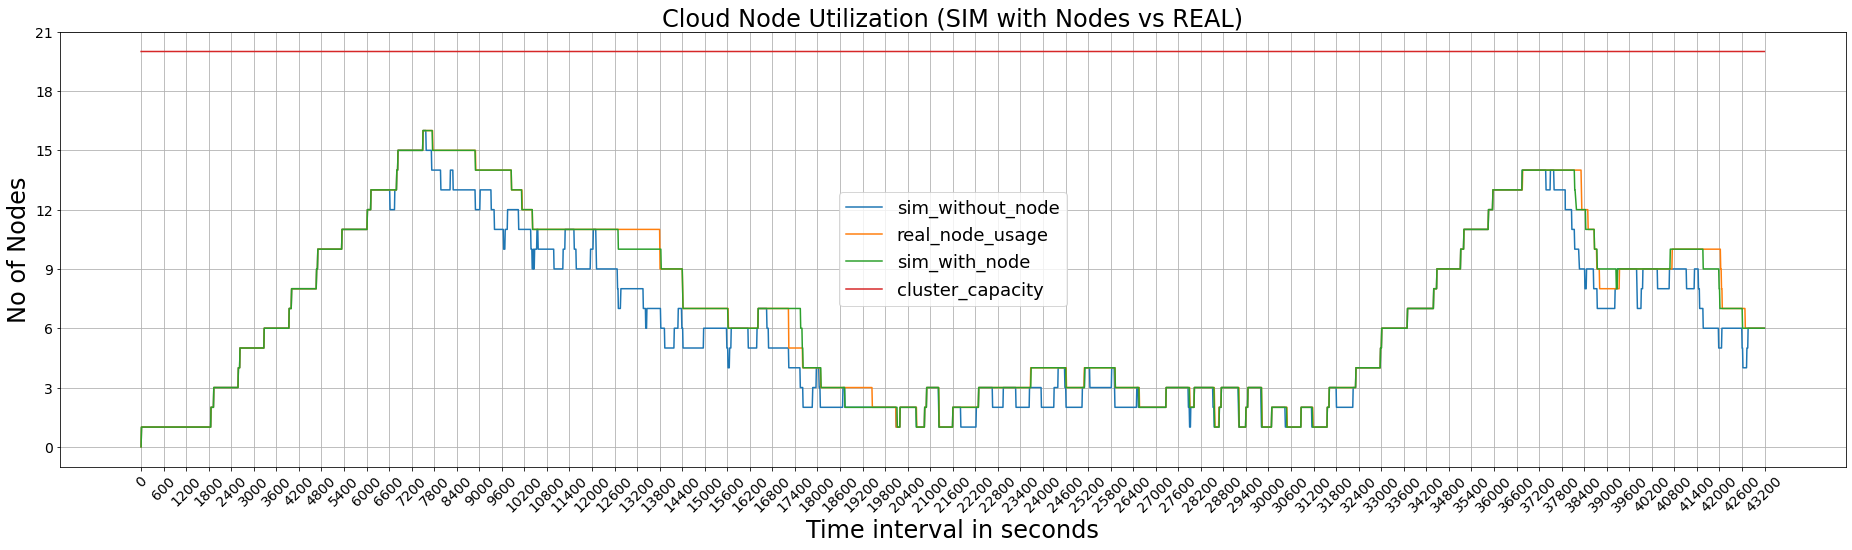

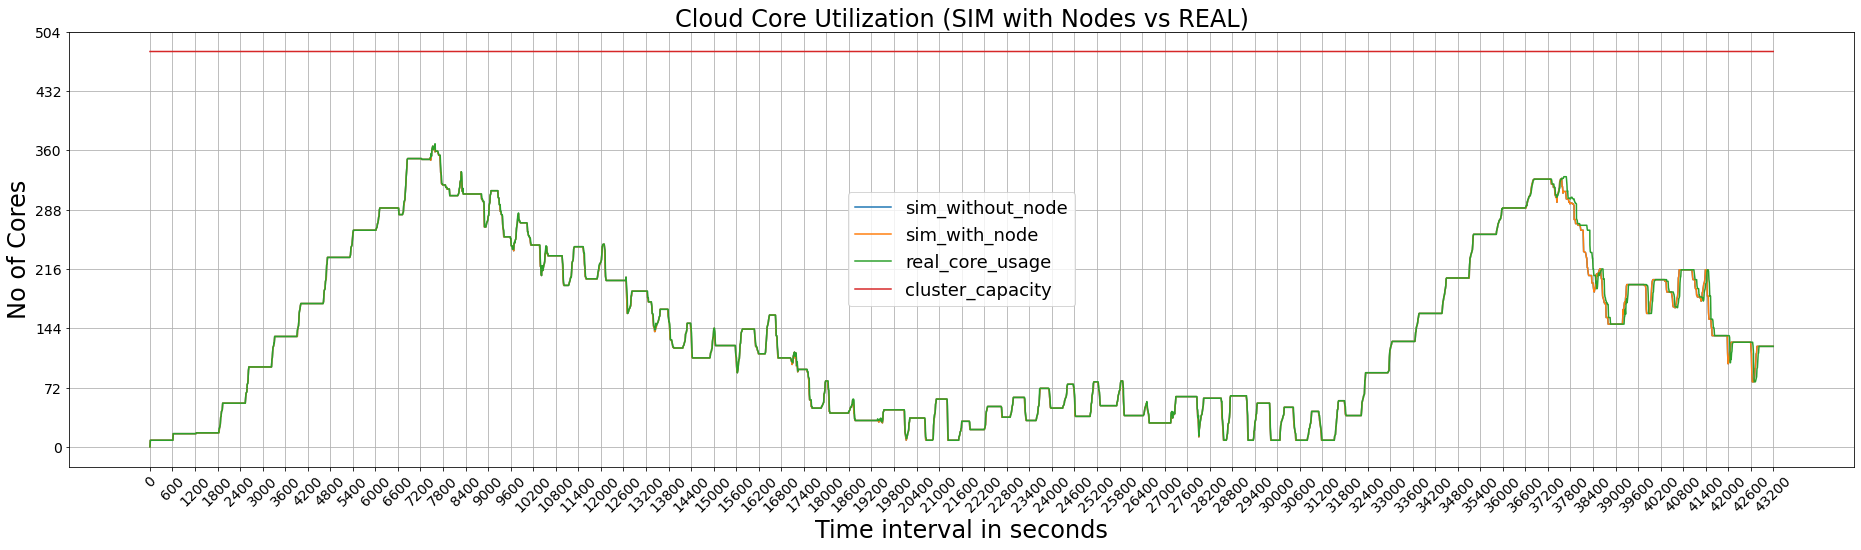

In [9]:
data = sim_run[['timestamp']]
cloud_silo_v_real = pd.DataFrame(data)
cloud_silo_v_real['sim_without_node'] = nonode_sim_run[['nodes_inuse']]
cloud_silo_v_real['real_node_usage'] = real_run[['nodes_in_use']]
cloud_silo_v_real['sim_with_node'] = sim_run[['nodes_inuse']]
cloud_silo_v_real['cluster_capacity'] = real_run[['nodes_owned']]

node_usage_graph(cloud_silo_v_real, 21, 'Cloud Node Utilization (SIM with Nodes vs REAL)')

print ("\n \n")
data = sim_run[['timestamp']]
cloud_silo_v_real = pd.DataFrame(data)
cloud_silo_v_real['sim_without_node'] = nonode_sim_run[['cores_inuse']]
cloud_silo_v_real['sim_with_node'] = sim_run[['cores_inuse']]
cloud_silo_v_real['real_core_usage'] = real_run[['cores_in_use']]
cloud_silo_v_real['cluster_capacity'] = real_run[['cores_owned']]

core_usage_graph(cloud_silo_v_real, 21, 'Cloud Core Utilization (SIM with Nodes vs REAL)')

# HPC Validation

In [10]:
slurmR03 = pd.read_csv(realSilo+'/slurm_silo-12h-run-03_metrics.csv')
sim_hpc_main = pd.read_csv(simSilo+'/hpc_main_all_output.csv')

real_timestamps = slurmR03['timestamp'].to_list()
real_run = slurmR03.loc[slurmR03['timestamp']<= 43200].copy()
#real_run.tail()

sim_run = sim_hpc_main.loc[sim_hpc_main['timestamp'].isin(real_timestamps)].copy()
sim_run = sim_run.reset_index(drop=True)
#sim_run.tail()

pandas.set_option('display.expand_frame_repr', False) # prints all columns without a line break. 
print('Records from Cloud Simulation that matches the experimental data')
print("\n ** ** HPC SIMULATION ** **\n")
print(sim_run[['nodes_cur_cap', 'nodes_inuse', 'jobs_waiting', 'jobs_running', 'jobs_done']].tail())


print("\n ** ** HPC REAL ** **\n")
print(real_run[['nodes_cur_cap', 'nodes_in_use', 'jobs_waiting', 'jobs_running', 'jobs_completed']].tail())

print ( "\n ** ** ** ** \n")

Records from Cloud Simulation that matches the experimental data

 ** ** HPC SIMULATION ** **

      nodes_cur_cap  nodes_inuse  jobs_waiting  jobs_running  jobs_done
4035             49            0             0             0        416
4036             49            0             0             0        416
4037             49            0             0             0        416
4038             49            0             0             0        416
4039             49            0             0             0        416

 ** ** HPC REAL ** **

      nodes_cur_cap  nodes_in_use  jobs_waiting  jobs_running  jobs_completed
4035             49             0             0             0             416
4036             49             0             0             0             416
4037             49             0             0             0             416
4038             49             0             0             0             416
4039             49             0             0            

## HPC utilization graph

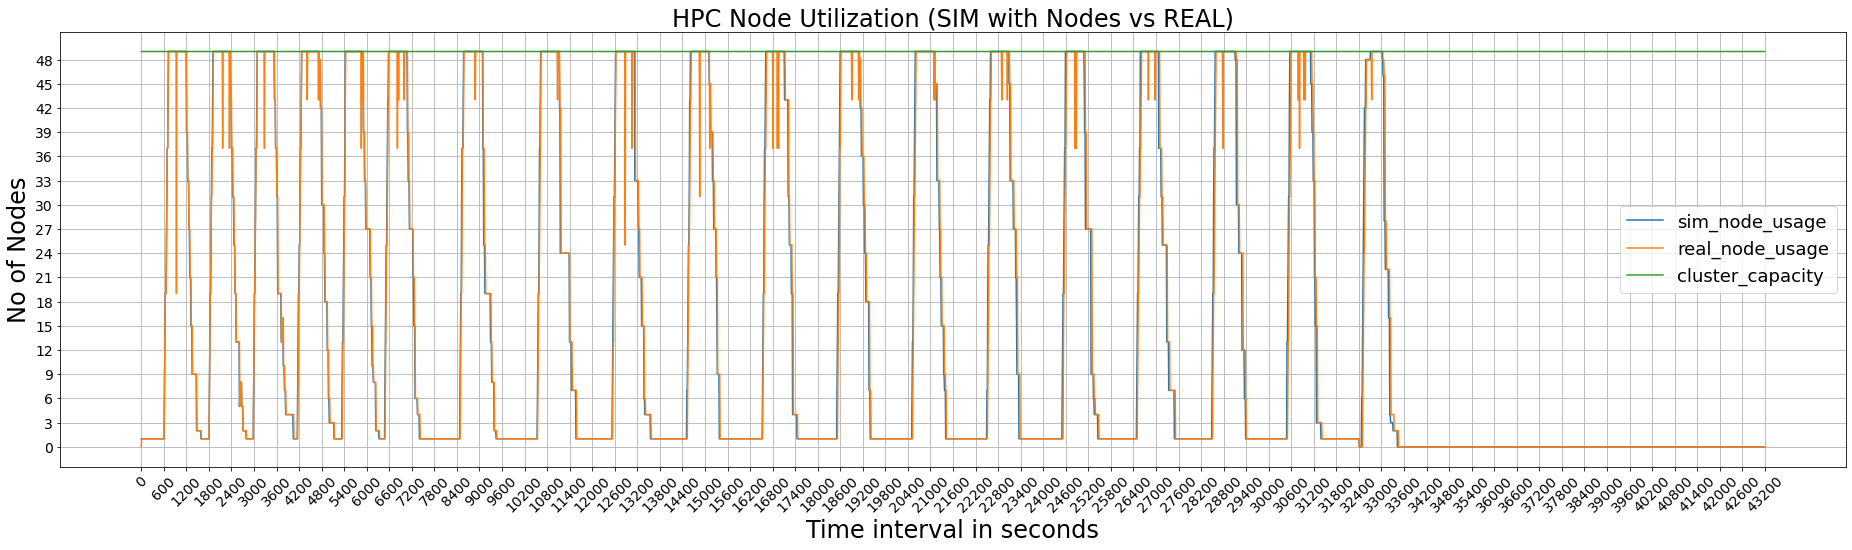

In [11]:
data = sim_run[['timestamp']]
hpc_silo_v_real = pd.DataFrame(data)
hpc_silo_v_real['sim_node_usage'] = sim_run[['nodes_inuse']] 
hpc_silo_v_real['real_node_usage'] = real_run[['nodes_in_use']]
hpc_silo_v_real['cluster_capacity'] = real_run[['nodes_owned']]

node_usage_graph(hpc_silo_v_real, 50, 'HPC Node Utilization (SIM with Nodes vs REAL)')

# BIGdata Validation

In [12]:
sim_bgd_main = pd.read_csv(simSilo+'/bigdata_main_all_output.csv')
sparkR07 = pd.read_csv(realSilo+'/spark_silo-12h-run-07_metrics.csv')
real_timestamps = sparkR07['timestamp'].to_list()
#ostackR06.tail() #shows that the value we need is 43191 
real_run = sparkR07.loc[sparkR07['timestamp']<= 43200].copy()
#real_run.tail()

sim_run = sim_bgd_main.loc[sim_bgd_main['timestamp'].isin(real_timestamps)].copy()
sim_run = sim_run.reset_index(drop=True)
#sim_run.tail()

pandas.set_option('display.expand_frame_repr', False) # prints all columns without a line break. 
print('Records from Bigdata Simulation that matches the experimental data')
print("\n ** ** Bigata SIMULATION ** **\n")
print(sim_run[['nodes_cur_cap', 'nodes_inuse', 'cores_owned', 'cores_inuse', 'jobs_waiting', 'jobs_running', 'jobs_done']].tail())


print("\n ** ** REAL Bigdata ** **\n")
print(real_run[['nodes_cur_cap', 'nodes_in_use', 'cores_owned', 'cores_in_use', 'jobs_waiting', 'jobs_running', 'jobs_completed']].tail())

print ( "\n ** ** ** ** \n")

Records from Bigdata Simulation that matches the experimental data

 ** ** Bigata SIMULATION ** **

      nodes_cur_cap  nodes_inuse  cores_owned  cores_inuse  jobs_waiting  jobs_running  jobs_done
3044             26            9          624           30            11            15       4352
3045             26            9          624           30            11            15       4352
3046             26            9          624           30            11            15       4352
3047             26            9          624           30            11            15       4352
3048             26            9          624           30            11            15       4352

 ** ** REAL Bigdata ** **

      nodes_cur_cap  nodes_in_use  cores_owned  cores_in_use  jobs_waiting  jobs_running  jobs_completed
3044             26             2          624            43          4378             0              21
3045             26             2          624            42          4378